(confidence-interval-notebook)=
# Intervallo di confidenza

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import arviz as az
import seaborn as sns
import pymc as pm
import pymc.sampling_jax
import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
pd.options.mode.chained_assignment = None

/Users/corrado/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

## Approcci Distinti nell'Inferenza Statistica

Il campo della statistica utilizza prevalentemente due metodi fondamentali per l'inferenza statistica:

1. **Approccio Bayesianista**: L'approccio bayesiano, come delineato da {cite:t}`jaynes2003probability`, considera la probabilità come una misura del grado di convinzione o credenza nella realizzazione di un evento o nella validità di un'affermazione. 

2. **Approccio Frequentista**: Al contrario, l'approccio frequentista interpreta la probabilità come la frequenza relativa di un evento nel lungo termine.

### Inferenza Statistica Frequentista: Intervallo di Confidenza

Nell'approccio frequentista, si pone enfasi sulla ripetizione di esperimenti in contesti casuali. Questo principio è fondamentale per comprendere l'intervallo di confidenza, un concetto chiave in questo approccio.

Quando si estrae un campione casuale da una popolazione più vasta, i risultati statistici derivanti dal campione possono non corrispondere esattamente ai parametri reali della popolazione. Questa discrepanza è attribuibile alla "variabilità campionaria". Per quantificarla e comprenderla meglio, si utilizza un indicatore chiamato "errore standard".

L'errore standard è una stima della deviazione standard della distribuzione di un estimatore statistico, che indica quanto si possa aspettare che la nostra stima si discosti dal valore vero nella popolazione. Questa misura è essenziale perché, nella maggior parte dei casi, non è possibile calcolare direttamente la deviazione standard della distribuzione campionaria, dato che ciò richiederebbe l'accesso a numerosi campioni dalla popolazione, una situazione raramente realizzabile. Di conseguenza, si stima la deviazione standard basandosi sul singolo campione disponibile, definendo tale stima come "errore standard" dello stimatore.

L'errore standard valuta la variabilità delle stime del parametro tra diversi campioni, fornendo un'indicazione su quanto la stima possa variare rispetto al valore vero del parametro nella popolazione. Attraverso l'errore standard, gli statistici frequentisti costruiscono l' "intervallo di confidenza", che rappresenta l'insieme di valori entro cui, a lungo termine, il vero parametro della popolazione si dovrebbe trovare con una certa probabilità $\gamma$. Ad esempio, con un livello di confidenza del 95%, ci aspettiamo che il vero valore del parametro rientri nel 95% degli intervalli di confidenza calcolati.

Questo metodo si applica a vari parametri statistici, come media, varianza o proporzione di una popolazione, offrendo una stima affidabile dell'intervallo entro cui il parametro della popolazione è presumibilmente situato, basata sui dati raccolti dal campione.

## Determinazione dell'intervallo di Confidenza

Nei casi in cui la distribuzione delle statistiche campionarie si avvicina a una distribuzione Normale, l'intervallo di confidenza al 95% è calcolato come:

$$
\hat{\theta} \pm 1.96 \cdot \text{SE},
$$

dove $\hat{\theta}$ rappresenta la stima del parametro e SE l'errore standard.

### Derivazione dell'Intervallo di Confidenza per una Popolazione Normale con Varianza Nota

Si consideri una popolazione che segue una distribuzione normale con una media nota $\mu$ e varianza $\sigma^2$. Prendiamo un campione casuale di dimensione $n$ da questa popolazione, indicato come $X_1, X_2, \dots, X_n$. Grazie alle proprietà delle distribuzioni normali, la media campionaria $\bar{X}$ segue anch'essa una distribuzione normale, nello specifico $\bar{X} \sim \mathcal{N}(\mu, \sigma^2/n)$.

#### Passo 1: Standardizzazione della Media Campionaria
- Per standardizzare la media campionaria in una variabile distribuita normalmente standard, sottraiamo la media della popolazione $\mu$ e dividiamo per lo scarto standard della media campionaria $\sigma/\sqrt{n}$. Ciò porta alla seguente trasformazione:
  
  $$
  Z = \frac{\bar{X} - \mu}{\sigma/\sqrt{n}} \sim \mathcal{N}(0, 1).
  $$

#### Passo 2: Stabilire il Livello di Confidenza
- Definiamo un livello di confidenza $\gamma = 1 - \alpha$, ad esempio $\gamma = 0.95$ per un livello di confidenza del 95%.
- Identifichiamo il valore critico $z$, corrispondente al quantile $(1 - \alpha/2)$ della distribuzione normale standard. Il valore $z$ rappresenta il punto di taglio alle estremità della distribuzione:
  
  $$
  P(-z \leq Z \leq z) = \gamma.
  $$

#### Passo 3: Formulazione dell'Intervallo di Confidenza
- Con il valore $z$ definito, formuliamo l'intervallo di confidenza per la media della popolazione:
  
  $$
  P\left(-z \leq \frac{\bar{X} - \mu}{\sigma/\sqrt{n}} \leq z\right) = \gamma.
  $$

#### Passo 4: Manipolazione Algebrica per Definire i Limiti
- Rielaboriamo la disuguaglianza per esporre i limiti dell'intervallo di confidenza:
  
  $$$
  \begin{align}
  P\bigg(-z \leq &\frac{ \bar{X} - \mu } {\sigma} \sqrt{n} \leq z\bigg) = \gamma\notag\\
  P\bigg(-z {\frac{\sigma}{\sqrt{n}}} \leq  &\bar{X} - \mu \leq z \frac{\sigma}{\sqrt{n}}\bigg) = \gamma\notag\\
  P\bigg(-\bar{X}-z {\frac{\sigma}{\sqrt{n}}} \leq &-\mu \leq -\bar{X} + z \frac{\sigma}{\sqrt{n}}\bigg) = \gamma\notag\\
  P\bigg(\bar{X}+z \frac{\sigma}{\sqrt{n}} \geq &\mu \geq  \bar{X} -z \frac{\sigma}{\sqrt{n}}\bigg) = \gamma.\notag
  \end{align}
  $$   

#### Passo 5: Specificazione dei Limiti dell'Intervallo
- Definiamo i limiti dell'intervallo di confidenza, $\hat{a}$ e $\hat{b}$, come segue:
  
  $$
  \hat{a} = \bar{X} - z \frac{\sigma}{\sqrt{n}}, 
  \quad \hat{b} = \bar{X} + z \frac{\sigma}{\sqrt{n}},
  $$
  
  con $P(\hat{a} \leq \mu \leq \hat{b}) = \gamma$.

#### Conclusione: 
- L'intervallo di confidenza $(\hat{a}, \hat{b})$ racchiude il vero valore della media della popolazione $\mu$ con una probabilità $\gamma$.


### Stima dell'Intervallo di Confidenza per Popolazioni Normali con Varianza Incognita

In contesti reali, quando si preleva un campione $X_1, \dots, X_n$ da una popolazione, la varianza $\sigma^2$ della popolazione è spesso incognita. Questo aggiunge incertezza riguardo alla media della popolazione $\mu$, che è il parametro di interesse. In questi casi, si adotta la distribuzione t di Student per la stima dell'intervallo di confidenza della media $\mu$, a causa della varianza incognita.

#### Passo 1: Impiego della Distribuzione t di Student
- Applichiamo la formula seguente per calcolare l'intervallo:
  
  $$
  P\left(−t^{\ast} \leq \frac{\bar{X} - \mu}{s/\sqrt{n}} \leq t^{\ast}\right) = \gamma,
  $$
  
  dove $\gamma = 1 - \alpha$ è il livello di confidenza, $s$ è la stima della deviazione standard $\sigma$ della popolazione, e $t^{\ast}$ è il quantile di ordine $1 - \alpha/2$ della distribuzione t con $n−1$ gradi di libertà. 

#### Passo 2: Determinazione dei Limiti dell'Intervallo di Confidenza
- Calcoliamo i limiti inferiore $\hat{a}$ e superiore $\hat{b}$ dell'intervallo di confidenza così:
  
  $$
  \hat{a} = \bar{X} - t^{\ast} \frac{s}{\sqrt{n}},
  \quad \hat{b} = \bar{X} + t^{\ast} \frac{s}{\sqrt{n}}.
  $$

#### Conclusione 

In queste circostanze, si sostituisce la varianza sconosciuta $\sigma^2$ con la sua stima $s$ e si utilizza la distribuzione t di Student invece della normale.

Applicabilità e Limitazioni:
- Il metodo presuppone che la popolazione segua una distribuzione normale e è valido anche per campioni di piccole dimensioni (ad esempio, $n < 30$) prelevati da tale popolazione.
- Se la popolazione non è normalmente distribuita e la dimensione del campione è ridotta, questo metodo potrebbe non essere idoneo.
- Tuttavia, per campioni di grandi dimensioni ($n \geq 30$), questo approccio rimane valido per la stima dell'intervallo di confidenza grazie al teorema del limite centrale, che si applica anche a popolazioni con distribuzioni non normali.

## Livello di Copertura

Il concetto di "livello di copertura" è fondamentale per interpretare correttamente gli intervalli di fiducia. Questo livello indica la frequenza con cui l'intervallo di fiducia include il valore reale del parametro della popolazione, in una serie di esperimenti ripetuti. 

Esempio di Livello di Copertura:
- Se il livello di copertura è del 95%, significa che, nel lungo periodo, il 95% degli intervalli di fiducia costruiti conterrà il valore vero del parametro. 
- Importante: Questo non implica che ci sia una probabilità del 95% che il valore vero del parametro cada in un particolare intervallo di fiducia. Infatti, il parametro della popolazione è un valore fisso e non soggetto a probabilità; piuttosto, l'incertezza risiede nell'intervallo di fiducia stesso.

Come Funziona la Copertura:
- Nel contesto frequentista, la "probabilità" si riferisce alla frequenza a lungo termine di un certo evento in un gran numero di ripetizioni dell'esperimento. 
- Nel caso degli intervalli di fiducia, l'"esperimento" è l'estrazione di un campione dalla popolazione, e l'"evento" è la generazione di un intervallo di fiducia che contiene il valore vero del parametro.
- Il livello di copertura, generalmente indicato come $1-\alpha$, rappresenta la probabilità a lungo termine che intervalli di fiducia costruiti con questa metodologia includano il vero valore del parametro.

Simulazione Pratica:
- Per illustrare questo concetto, eseguiamo una simulazione con la popolazione degli adulti maschi italiani, assunta come normalmente distribuita con media 175 cm e varianza 49 cm². 
- Eseguiamo 1000 ripetizioni di un esperimento, estraendo ogni volta un campione di 30 individui. 
- Per ciascun campione, calcoliamo l'intervallo di fiducia al 95% usando la formula:
  
  $$
  \bar{X} \pm t \frac{s}{\sqrt{n}},
  $$
  
  dove $\bar{X}$ è la media campionaria, $s$ è la deviazione standard campionaria e $t$ è il valore critico della distribuzione t-Student per $n-1$ gradi di libertà al livello di significatività $\alpha/2 = 0.025$.
- Registriamo i limiti di ciascun intervallo e controlliamo quanti di essi includono effettivamente il vero valore medio della popolazione.

Attraverso questa simulazione, possiamo visualizzare concretamente il concetto di livello di copertura e la sua importanza nella statistica frequentista.

Iniziamo generando 1000 campioni casuali di dimensione $n=30$ da una distribuzione normale con media $175$ e deviazione standard $7$.

In [3]:
mu = 175
sigma = 7
n = 30
n_samples = 1000

samples = np.stack([np.random.normal(loc=mu, scale=sigma, size=n) for i in range(n_samples)])
samples.shape

(1000, 30)

Il primo campione di ampiezza $n$ = 30 che abbiamo ottenuto è il seguente.

In [4]:
print(*samples[1, :])

168.0235843261227 178.92342025975285 158.65889923372802 179.6303178730518 177.75078650361684 177.31866698901266 169.88844431975423 173.99135052495092 155.63817562258805 169.53704629450522 172.1846365663152 170.11193088235237 189.1162327429333 178.5978486138266 167.63106248293263 180.74371060129255 177.18646634486203 176.28306680516667 176.60288472870744 168.93824655712658 167.2950031353247 179.81886746832015 182.67806668453912 173.1038294930573 177.77855556665045 181.75181825006547 182.07547839535917 180.19577862001373 169.15707072920102 178.34792586562392


Stampiamo qui di seguito le medie dei primi dieci campioni.

In [5]:
xbar = samples.mean(axis=1)
print(*xbar[0:10])

175.4166043369681 174.63197241602512 175.9696501580123 176.6702639047767 173.8864949976773 174.33756273615305 177.7103476536556 174.7674110831892 175.57384560218222 174.09523033929497


Troviamo ora il valore critico della distribuzione $t$ di Student con (30-1) gradi di libertà.

In [6]:
alpha = 0.05
t = st.t.ppf(1 - alpha/2, n-1)
t

2.045229642132703

Utilizzando le informazioni precedenti, possiamo calcolare 1000 intervalli di confidenza per la media della popolazione.

In [7]:
interval_width = t * samples.std(axis=1, ddof=1) / np.sqrt(n)
CI_low = samples.mean(axis=1) - interval_width
CI_high = samples.mean(axis=1) + interval_width

Calcoliamo ora il livello di copertura, ovvero il numero di volte in cui l'intervallo di confidenza calcolato contiene il vero valore del parametro.

In [8]:
coverage_p = np.sum(np.logical_and(CI_low < mu, mu < CI_high)) / samples.shape[0]
coverage_p

0.954

In conclusione, ripetendo la simulazione per 1000 volte, abbiamo ottenuto una proporzione di intervalli di confidenza del 95% che contengono il parametro (ovvero il livello di copertura) molto vicino al valore nominale di $1 - \alpha = 0.95$.


### Il Concetto di Livello di Confidenza
Gli intervalli di confidenza sono range di valori che, con una certa sicurezza statistica, si ritiene includano il parametro di interesse. Tuttavia, è cruciale distinguere tra "livello di confidenza" e "probabilità che il parametro sia all'interno dell'intervallo". 
- Il livello di confidenza (es. 95%) indica la frequenza con cui, se ripetessimo l'esperimento molte volte, gli intervalli calcolati includerebbero il vero valore del parametro.
- Non è corretto interpretarlo come la probabilità che in un dato intervallo di confidenza si trovi il parametro.

### L'Interpretazione Frequentista
Secondo l'approccio frequentista, l'intervallo di confidenza si deve considerare come una metodologia:
- Se ripetiamo l'esperimento (estrarre un campione e calcolare l'intervallo di confidenza) molte volte, il metodo produce un intervallo che coprirà il valore vero del parametro nel 95% dei casi, assumendo un livello di confidenza del 95%.
- Non è corretto affermare che un specifico intervallo di confidenza contenga con certezza il valore vero del parametro.

### L'Errore Comune nell'Interpretazione
È un errore comune, anche tra i ricercatori, interpretare l'intervallo di confidenza come la probabilità che il parametro (es. la media della popolazione $\mu$) si trovi all'interno di un intervallo specifico (es. $[\hat{a}, \hat{b}]$).

La formulazione corretta è:
- "La metodologia usata per calcolare l'intervallo $[\hat{a}, \hat{b}]$ ha il 95% di probabilità di generare un intervallo che include il vero valore del parametro".
- Questo significa che l'intervallo di confidenza non dà una probabilità sulla posizione esatta del parametro, ma indica la probabilità che la procedura usata per calcolarlo produca un intervallo che lo include.

In sintesi, l'intervallo di confidenza ci offre una sicurezza statistica sulla procedura utilizzata per calcolarlo, piuttosto che una probabilità sulla posizione del parametro stesso.

### Fraintendimenti Comuni sugli Intervalli di Confidenza

Nel loro lavoro, {cite}`hoekstra2014robust` evidenziano come, nonostante l'ampio riconoscimento dei limiti dei test di ipotesi nulle, gli intervalli di confidenza siano spesso consigliati per l'inferenza statistica. Anche l'American Psychological Association (APA) suggerisce che gli intervalli di confidenza siano "in generale, la migliore strategia di reportistica". Tuttavia, {cite}`hoekstra2014robust` sottolineano che queste raccomandazioni non considerano la difficoltà nel fornire una corretta interpretazione degli intervalli di confidenza.

Per indagare l'interpretazione degli intervalli di confidenza, Hoekstra et al. hanno condotto uno studio con due domande principali:

1. Quanto frequentemente intervalli di confidenza sono mal interpretati da studenti e ricercatori?
2. L'esperienza nella ricerca riduce le interpretazioni errate degli intervalli di confidenza?

Prima di presentare lo studio, {cite}`hoekstra2014robust` ricordano qual è l'interpretazione corretta degli intervalli di confidenza. 

> A CI is a numerical interval constructed around the estimate of a parameter. Such an interval does not, however, directly indicate a property of the parameter; instead, it indicates a property of the procedure, as is typical for a frequentist technique. Specifically, we may find that a particular procedure, when used repeatedly across a series of hypothetical data sets (i.e., the sample space), yields intervals that contain the true parameter value in 95% of the cases. When such a procedure is applied to a particular data set, the resulting interval is said to be a 95% CI. The key point is that the CIs do not provide for a statement about the parameter as it relates to the particular sample at hand; instead, they provide for a statement about the performance of the procedure of drawing such intervals in repeated use. Hence, it is incorrect to interpret a CI as the probability that the true value is within the interval (e.g., Berger & Wolpert, 1988). As is the case with $p$-values, CIs do not allow one to make probability statements about parameters or hypotheses.

Nel loro studio, {cite:t}`hoekstra2014robust` hanno presentato un questionario a 596 partecipanti, tra cui studenti universitari e ricercatori, con le seguenti affermazioni riguardanti l'interpretazione degli intervalli di confidenza.

> Professor Bumbledorf conducts an experiment, analyzes the data, and reports: "The 95% confidence interval for the mean ranges from 0.1 to 0.4." Please mark each of the statements below as 'true' or 'false'.

> 1.  The probability that the true mean is greater than 0 is at least 95%.
> 2.  The probability that the true mean equals 0 is smaller than 5%.
> 3.  The "null hypothesis" that the true mean equals 0 is likely to be incorrect.
> 4.  There is a 95% probability that the true mean lies between 0.1 and 0.4.
> 5.  We can be 95% confident that the true mean lies between 0.1 and 0.4.
> 6.  If we were to repeat the experiment over and over, then 95% of the time the true mean falls between 0.1 and 0.4.

Sorprendentemente, tutte le sei affermazioni nel questionario erano tecnicamente errate, ma molti partecipanti hanno concordato con esse. I risultati mostrano che, in media, i partecipanti hanno concordato con circa 3.5 affermazioni errate su 6. Non è stata rilevata una differenza di rilievo nell'interpretazione degli intervalli di confidenza tra studenti e ricercatori, suggerendo che l'esperienza nella ricerca non migliora necessariamente la comprensione di questo concetto.

Questi risultati suggeriscono che le interpretazioni errate degli intervalli di confidenza sono ampiamente diffuse, e che l'esperienza nella ricerca non garantisce una comprensione migliore. Ciò solleva dubbi sull'efficacia degli intervalli di confidenza frequentisti e porta alcuni a favorire gli "intervalli di credibilità" Bayesiani, che tendono ad essere più intuitivi e più facilmente interpretati correttamente.

## Confronto tra Intervalli Frequentisti e Bayesiani

Concludiamo questo capitolo esaminando le differenze tra l'intervallo di confidenza frequentista e l'intervallo di credibilità bayesiano, utilizzando lo stesso set di dati per entrambi i calcoli.

Immaginiamo di avere un gruppo di 20 osservazioni relative alla performance in un test cognitivo. Il nostro obiettivo è stimare la media della popolazione da cui sono state tratte queste osservazioni. Per farlo, simuliamo 20 valori casuali da una popolazione che segue una distribuzione normale con media 50 e deviazione standard 10, rappresentata da $\mathcal{N}(50, 10)$.

In [9]:
sample_size = 20
mu = 50
sigma = 10
sample_data = np.random.normal(loc=mu, scale=sigma, size=n)
print(sample_data)

[35.44430526 50.37619113 57.82069969 61.49685418 63.31102252 48.02910401
 45.18235321 62.82355297 63.92752261 41.20279962 42.11268884 55.99844846
 60.07445322 33.05071348 54.83105374 45.6758504  59.98376005 42.96708554
 48.40015995 36.32776835 40.67411814 43.3548912  41.33663651 60.06455434
 46.82724403 64.13341426 51.02910962 40.08284525 49.95768882 50.41745881]


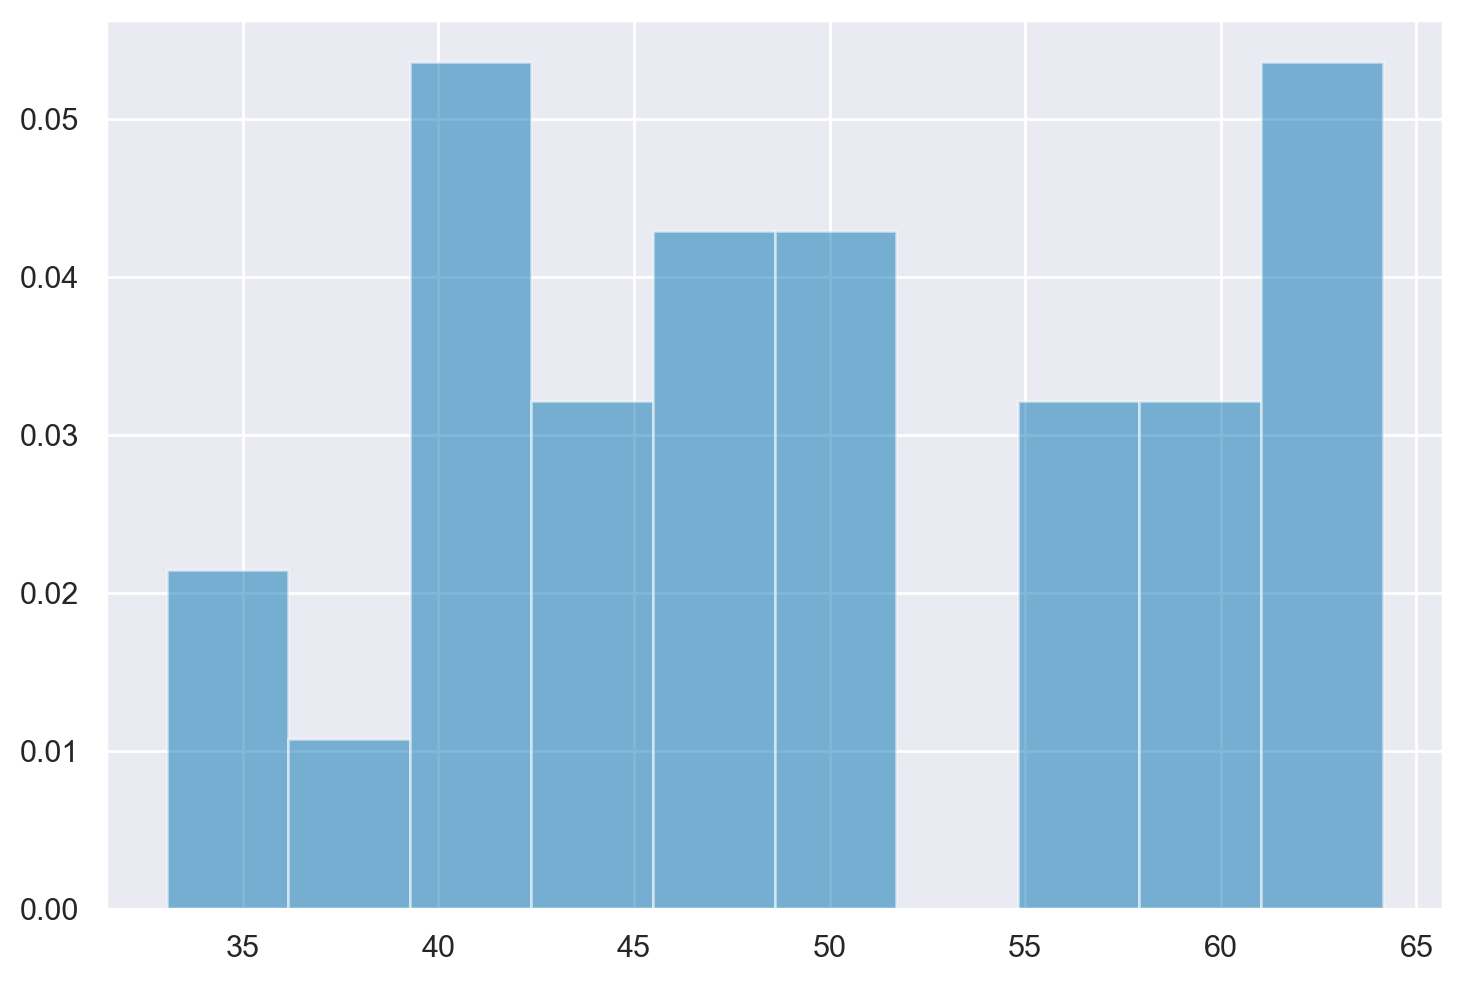

In [10]:
plt.hist(sample_data, density=True, alpha=0.5)
plt.show()

### Intervallo di Confidenza Frequentista

Quando ci si avvicina al problema di stimare la media della popolazione, $\mu$, attraverso un approccio frequentista, uno dei metodi più comuni è la stima puntuale. Questo metodo consiste nell'utilizzare un unico valore, solitamente la media del campione, per rappresentare il parametro della popolazione che non conosciamo.

La media campionaria, indicata come $\hat{\mu}$, è una scelta frequente per la stima puntuale della media della popolazione, $\mu$. Si calcola sommando tutti i valori osservati nel campione, ovvero $X_1, X_2, ..., X_n$, e dividendo questa somma per il numero totale di osservazioni nel campione, $n$:

$$
\hat{\mu} = \frac{1}{n} \sum_{i=1}^n X_i.
$$

Applicando questa formula ai dati del nostro esempio, otteniamo

In [11]:
sample_mean = np.mean(sample_data)
sample_mean

49.897144940464585

Mentre le stime puntuali offrono un valore specifico per rappresentare il parametro della popolazione, non riescono da sole a descrivere completamente l'incertezza associata a questa stima. Per affrontare questa lacuna, l'approccio frequentista si avvale degli intervalli di confidenza. Un intervallo di confidenza fornisce una gamma di valori all'interno dei quali si presume che il vero parametro della popolazione cada, basandosi sui dati osservati. Questo intervallo viene definito aggiungendo e sottraendo un margine di errore alla stima puntuale:

$$\hat{\mu} \pm m = [\hat{\mu} - m, \hat{\mu} + m].$$

Il margine di errore, che riflette la variabilità dei dati del campione, dipende sia dal livello di confidenza scelto, indicato come $1-\alpha$, sia dalla dimensione del campione, $n$. Ad esempio, un intervallo di confidenza del 95% significa che ci si aspetta che l'intervallo includa il vero parametro della popolazione nel 95% delle applicazioni di questa procedura.

Il margine di errore si calcola normalmente attraverso l'errore standard (SE) della stima puntuale, e viene definito da:

$$m = t_{1-\frac{\alpha}{2}, n-1} \times SE,$$

dove $t_{1-\frac{\alpha}{2}, n-1}$ rappresenta il valore critico dalla distribuzione t per il livello di confidenza desiderato e $n-1$ gradi di libertà.

L'errore standard della media campionaria si ottiene dividendo la deviazione standard del campione, $\sigma$, per la radice quadrata della dimensione del campione:

$$SE = \frac{\sigma}{\sqrt{n}}.$$

Applicando questa formula ai dati del nostro esempio, la deviazione standard del campione risulta

In [12]:
sample_stddev = np.std(sample_data, ddof=1)
sample_stddev

9.3396311992263

L'errore standard della media è

In [13]:
standard_error = sample_stddev / np.sqrt(sample_size)
print(standard_error)

2.0884050246247887


L'errore standard della media rappresenta una stima della deviazione standard della distribuzione delle medie campionarie per campioni di dimensione $n$ (in questo caso, $n$ = 20).

Supponiamo di voler avere un livello di confidenza del 95%. Per trovare il valore critico della distribuzione $t$ di Student, dobbiamo trovare il valore della statistica $T$ che lascia il 2.5% dell'area sotto la coda a sinistra e il 2.5% dell'area sotto la coda a destra della distribuzione $t$ di Student con 19 gradi di libertà.

In [14]:
degrees_of_freedom = sample_size - 1
t_val = st.t.ppf(0.975, degrees_of_freedom)
print(t_val)

2.093024054408263


Il margine d'errore è uguale a 

$$t \cdot SE$$

ovvero

In [15]:
margin_of_error = t_val * standard_error
print(margin_of_error)

4.371081951886763


L'intervallo di confidenza frequentista è uguale a 

$$\text{stima del parametro} \pm \text{margine d'errore}$$

ovvero

$$\bar{x} \pm t_{\text{critico}} \frac{s}{\sqrt{n}}.$$

Per i dati dell'esempio otteniamo

In [16]:
confidence_interval_lower = sample_mean - margin_of_error
confidence_interval_upper = sample_mean + margin_of_error
confidence_interval = [confidence_interval_lower, confidence_interval_upper]
print(confidence_interval)

[45.52606298857782, 54.26822689235135]


Interpretiamo questo risultato dicendo che la procedura utilizzata per calcolare l'intervallo $[42.99, 53.23]$ include $\mu$ nel 95% dei casi.

La figura successiva mostra la distribuzione dei dati, la stima di $\mu$ (ovvero, la media del campione) e l'intervalli di confidenza al 95%.

In [17]:
def visualize_output(sample_data, sample_mean, interval, type_interval):
    plt.hist(sample_data, density=True, alpha=0.5)
    plt.axvline(x=sample_mean, color='r', linestyle='dashed', linewidth=2)
    plt.axvline(x=interval[0], color='g', linewidth=2)
    plt.axvline(x=interval[1], color='g', linewidth=2)
    plt.legend(['Sample Mean', f'{type_interval} interval'])

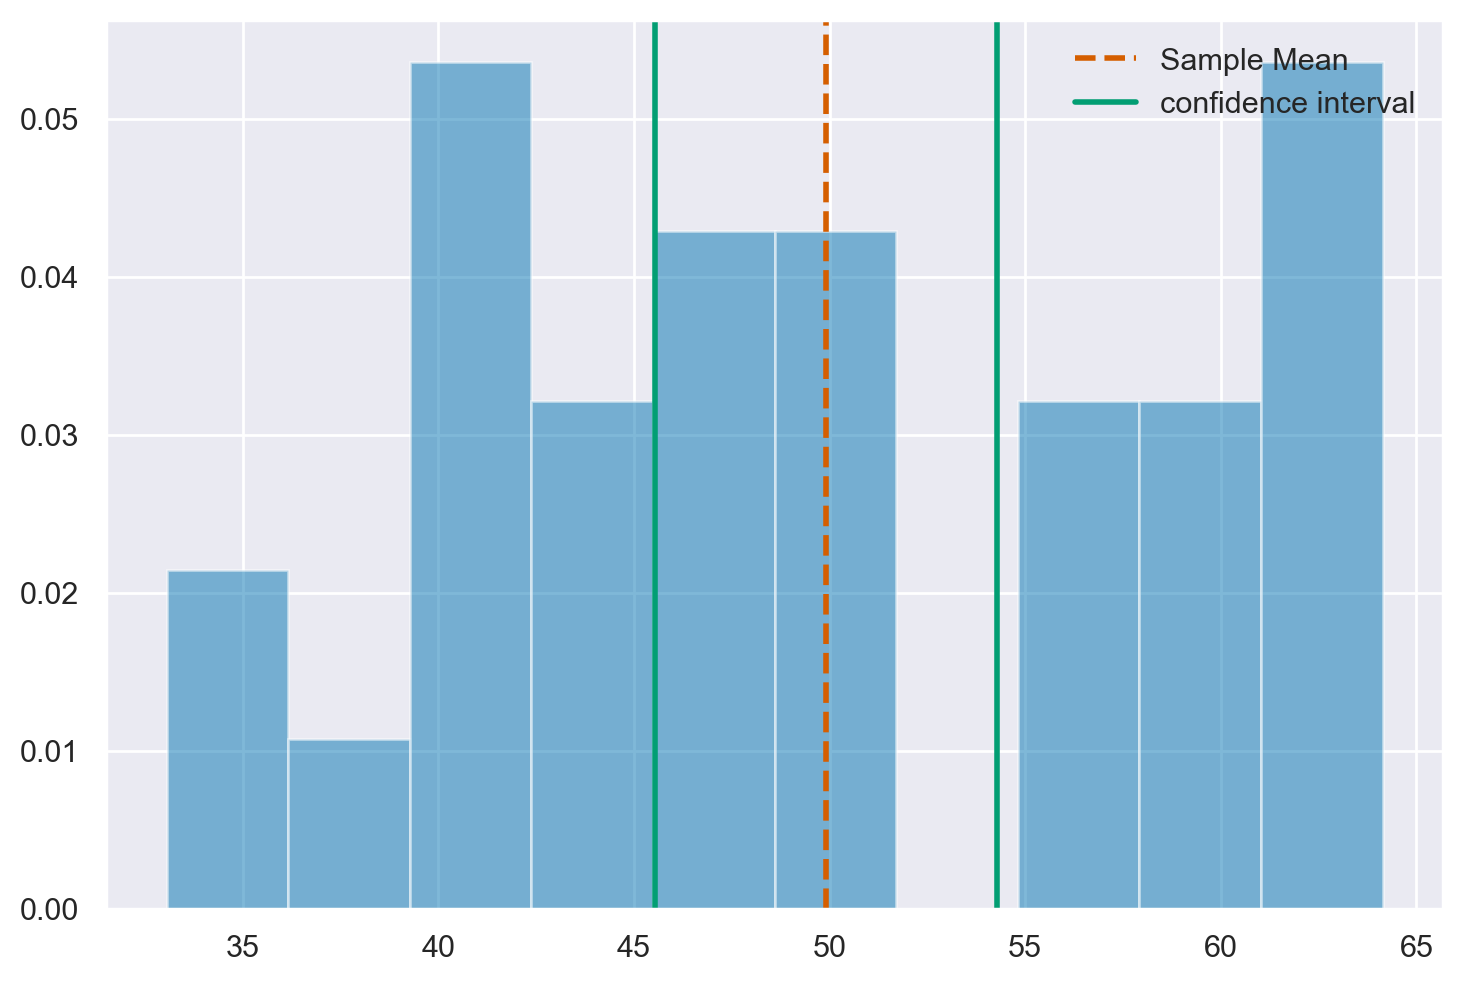

In [18]:
visualize_output(sample_data, sample_mean, confidence_interval, 'confidence')


### Intervallo di Credibilità Bayesiano

Per determinare l'intervallo di credibilità bayesiano, impieghiamo un modello statistico basato sulla distribuzione Normale, integrando distribuzioni a priori che forniscono informazioni iniziali limitate sui parametri. Questa strategia ci consente di inserire delle conoscenze preliminari, pur essendo vaghe, nell'analisi statistica.

Dettagli sulle scelte delle distribuzioni a priori:
- Per il parametro $\mu$, impostiamo una distribuzione a priori centrata intorno allo zero, con una deviazione standard piuttosto ampia. Come alternativa, si potrebbe considerare di centrare la distribuzione a priori sulla media campionaria.
- Per il parametro $\sigma$, adottiamo una distribuzione Normale troncata, posizionata anch'essa intorno allo zero, ma con una deviazione standard notevolmente grande.

La scelta di centrare le distribuzioni a priori sullo zero è volta a evitare l'introduzione di bias nell'analisi, tendendo verso una stima conservativa, ossia una stima del parametro incline allo zero. La decisione di usare deviazioni standard molto ampie riflette la debolezza delle informazioni preliminari che abbiamo incorporato nel modello.

Ciò detto, abbiamo introdotto alcune conoscenze iniziali nell'analisi: in particolare, l'assunzione che valori eccessivamente elevati, sia positivi che negativi, per la media del campione siano improbabili. Questa considerazione riflette una cautela nell'estimare il parametro, evitando di considerare valori estremi come plausibili.

In [19]:
model = pm.Model()

with model:
    mu = pm.Normal("mu", mu=0, sigma=200)
    sigma = pm.HalfNormal("sigma", 100)
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=sample_data)

In [20]:
with model:
    idata = pm.sampling_jax.sample_numpyro_nuts()

Compiling...


Compilation time = 0:00:01.288662


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1027.42it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1028.27it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1029.34it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1030.23it/s]


Sampling time = 0:00:02.267764


Transforming variables...


Transformation time = 0:00:00.097112


In [21]:
az.summary(idata, hdi_prob=0.95, round_to=2)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,49.85,1.82,46.10,53.21,0.03,0.02,3082.23,2335.22,1.0
sigma,9.76,1.30,7.41,12.34,0.02,0.02,3010.46,2748.49,1.0


Si noti che, dati i dati specifici e la formulazione del modello bayesiano in uso, l'intervallo di credibilità ottenuto si mostra molto simile all'intervallo di confidenza calcolato secondo l'approccio frequentista. Tuttavia, l'interpretazione di questi due intervalli differisce significativamente.

Nel caso dell'intervallo di credibilità bayesiano, possiamo affermare che, in base al nostro grado di credenza soggettiva del 95%, la media della popolazione si trova all'interno dell'intervallo specificato. Questo è un'affermazione diretta sulla probabilità che la media della popolazione rientri in un determinato intervallo, basata sulle informazioni priori e sui dati osservati.

In contrasto, l'intervallo di confidenza frequentista non permette un'interpretazione diretta riguardo alla probabilità della media della popolazione di cadere in un dato intervallo. Invece, l'interpretazione frequentista indica che, se ripetessimo il processo di campionamento molte volte, il 95% degli intervalli di confidenza calcolati conterrebbe la vera media della popolazione.

Quindi, mentre l'intervallo di credibilità bayesiano fornisce una misura diretta della credenza nella posizione della media della popolazione, l'intervallo di confidenza frequentista fornisce una misura di affidabilità del processo di stima nel lungo termine.

## Riflessioni Conclusive

Come sottolineato da {cite:t}`hoekstra2014robust`, è comune riscontrare fraintendimenti riguardo agli intervalli di fiducia. Il "livello di confidenza del 95%" è da interpretarsi come la probabilità a lungo termine che, in una serie di intervalli di fiducia calcolati, il 95% di essi includa il vero valore del parametro sconosciuto. Tuttavia, per un singolo intervallo di fiducia, non è possibile dichiarare con sicurezza che questo contenga effettivamente il parametro di interesse. In altre parole, la certezza sulla presenza del parametro sconosciuto all'interno di un dato intervallo di fiducia non è garantita per ogni singolo caso analizzato.

È inoltre inesatto presumere che esista un legame diretto tra la varianza e la media di un campione, ipotizzando che un intervallo di fiducia più ristretto implichi maggiore precisione. Nella prospettiva frequentista, la "precisione" è strettamente legata al livello di copertura a lungo termine assicurato dal metodo usato per creare gli intervalli di fiducia. Questo concetto non si applica al singolo intervallo di fiducia osservato. Dunque, un intervallo di fiducia che si presenta estremamente ristretto potrebbe in realtà essere significativamente lontano dal valore vero del parametro non noto.

## Watermark

In [22]:
%load_ext watermark
%watermark -n -u -v -iv -w 

Last updated: Thu Jan 25 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.19.0

pandas    : 2.1.4
matplotlib: 3.8.2
scipy     : 1.11.4
seaborn   : 0.13.0
numpy     : 1.26.2
pymc      : 5.10.3
arviz     : 0.17.0

Watermark: 2.4.3

